# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

## Sigmoid Function

$$ g(x) = \frac{1}{1 + e^{-x}} $$

In [2]:
x = np.linspace(
    scipy.stats.logistic.ppf(0.001),
    scipy.stats.logistic.ppf(0.999), 100
)

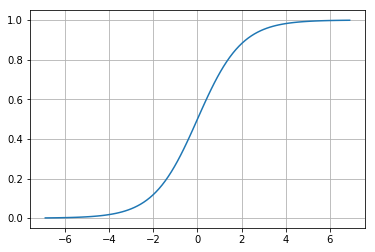

In [3]:
plt.plot(x, scipy.stats.logistic.cdf(x))
plt.grid()

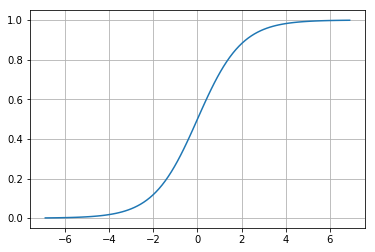

In [4]:
def sigmoid(z):
    return (1 + np.exp(-z)) ** -1

plt.plot(x, sigmoid(x))
plt.grid()

## Hypothesis Representation

$$ h_{\theta}(x) = g(\theta^T x) $$

$$ g(z) = \frac{1}{1 + e^{-z}} $$

$h_{\theta}$ gives a probability that output is 1.

$$ h_{\theta}(x) = P(y = 1 \mid x, \theta) =
1 - P(y = 0 \mid x, \theta) $$

$$ P(y = 1 \mid x, \theta) + P(y = 0 \mid x, \theta) = 1 $$

### Decision Boundary

Decision boundary translates output of hypothesis function to discrete 0 or 1 classifications:

$$ h_{\theta}(x) \geq 0.5 \implies y = 1 $$

$$ h_{\theta}(x) < 0.5 \implies y = 0 $$

Logistic function behaves like:

$$ g(z) \geq 0.5, z \geq 0 $$

Therefore:

$$ \theta^T x \geq 0 \implies y = 1 $$

$$ \theta^T x < 0 \implies y = 0 $$

## Logistic Regression Model

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data_filename = 'data/ex2data1.txt'
data = np.loadtxt(data_filename, delimiter=',')
data.shape

(100, 3)

In [7]:
raw_X = data[:, 0:2]
y = data[:, 2]

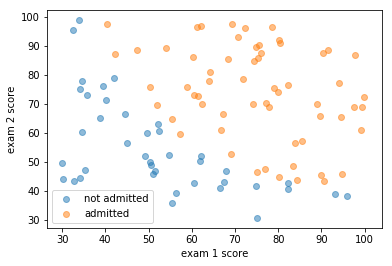

In [8]:
def plot_data(X, y):
    exam_1 = X[:, 0]
    exam_2 = X[:, 1]
    for i in [(0, 'not admitted'), (1, 'admitted')]:
        index = y == i[0]
        plt.scatter(
            exam_1[index],
            exam_2[index],
            label=i[1],
            alpha=0.5
        )
    plt.legend()
    plt.xlabel('exam 1 score')
    plt.ylabel('exam 2 score')
plot_data(raw_X, y) 

- $m$ is number of training examples
- $n$ is number of features

In [9]:
m, n = raw_X.shape
m, n

(100, 2)

In [10]:
X = np.concatenate((np.ones((m, 1)), raw_X), axis=1)
X.dtype

dtype('float64')

### Cost Function and Gradient

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}
(-y^{(i)} \log(h_{\theta}(x^{(i)}) - 
(1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} =
\frac{1}{m} \sum_{i=1}^{m}
(h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} $$

In [11]:
# eplison so log will not fail on zeros
EPS = np.finfo(np.float64).eps

In [12]:
def cost_function(theta, X, y):
    m = y.shape[0]
    h_theta = sigmoid(X.dot(theta))
    m_inv = 1 / m
    J = m_inv * (-y.dot(np.log(h_theta + EPS)) - (1 - y).dot(np.log(1 - h_theta + EPS)))
    gradient = m_inv * (h_theta - y).dot(X)
    return J, gradient

In [13]:
cost_function(np.array([-24, 0.2, 0.2]), X, y)

(0.21833019382659735, array([ 0.04290299,  2.56623412,  2.64679737]))

In [14]:
from scipy.optimize import minimize

In [15]:
initial_theta = np.zeros(n + 1)
res = minimize(
    fun=lambda theta: cost_function(theta, X, y),
    x0=initial_theta,
    jac=True,
    options={'maxiter': 400, 'disp': True}
)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 24
         Function evaluations: 32
         Gradient evaluations: 32


In [16]:
print('success: ', res.success)
print('theta: ', res.x)
theta = res.x

success:  True
theta:  [-25.16115684   0.20623032   0.20147018]


### Plot Decision Boundary

The decision boudary is where $ \theta^T X = 0 $.

$$ \theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0 $$
$$ x_2 = \frac{\theta_1 x_1 + \theta_0}{\theta_2} $$

In [17]:
# find end points, x1s
plot_x = np.array([min(X[:, 1]), max(X[:, 1])])
plot_x

array([ 30.05882245,  99.8278578 ])

In [18]:
# compute x2s
plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
plot_y

array([ 94.1187266 ,  22.70125633])

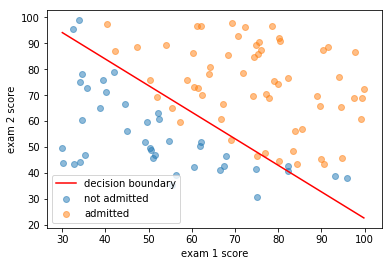

In [19]:
plot_data(raw_X, y)
plt.plot(plot_x, plot_y, c='r', label='decision boundary')
plt.legend()

In [20]:
sigmoid(np.array([1, 45, 85]).dot(theta))

0.7762894342405029

### Compute Accuracy

In [21]:
def predict(theta, X):
    m = X.shape[0]
    return sigmoid(X.dot(theta)) >= 0.5
    
accuracy = np.mean(predict(theta, X) == y) * 100
print('train accuracy: {}%'.format(accuracy))

train accuracy: 89.0%
